<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.font_manager import FontProperties

In [49]:
# Loading datasets
data = pd.read_csv('data/varying_LR_data.csv', names = ['tech', 'form', 'a', 'b','c','d','m'], header=0)
hist_cost_data = pd.read_csv('data/Historical_data_summary.csv', names = ['tech', 'year', 'c_inv','installed_cap'], header=0)
hist_cost_electrolysis = pd.read_csv('data/Historical_electrolysis.csv', names = ['tech', 'year', 'c_inv','installed_cap','annual_prod'], header=0)
hist_cost_carbon_capture = pd.read_csv('data/Historical_carbon_capture.csv', names = ['tech', 'year', 'c_inv','installed_cap'], header=0)
hist_cost_gshp = pd.read_csv('data/Historical_gshp.csv', names = ['tech', 'year', 'c_inv','installed_cap'], header=0)
future_cost_data = pd.read_csv('data/Cost_data_summary_V2.csv', names = ['tech', 'year', 'cost_ratio', 'c_inv','installed_cap','annual_prod'], header=0)

In [72]:
plt.rcParams.update({'font.size': 21})
plt.rcParams["figure.figsize"] = (6,5)
plt.tight_layout()

<Figure size 432x360 with 0 Axes>

In [51]:
# colours 

colour_main_axis = "rgb(10,10,10)"
colour_second_axis = "rgb(10,10,10)"
colour_carbon_capture = "rgb(105,105,105)"

# Blue
colour_onshore_wind = 'rgb(0,0,205)'
colour_offshore_wind = 'rgb(30,144,255)'
colour_hydro = 'rgb(25,25,112)'

# Yellow/orange
colour_res_pv = (255/255,220/255,0)
colour_uti_pv = 'rgb(255,180,0)'
colour_com_pv = 'rgb(255,140,0)'
colour_csp_solar = 'rgb(218,165,32)'

# other
colour_gshp = 'rgb(50,205,50)'
colour_ashp = 'rgb(0,128,128)'
colour_geoth = 'rgb(0,100,0)'
colour_soec = 'rgb(139,0,139)'
colour_alk = 'rgb(210,105,30)'
colour_pem = 'rgb(178,34,34)'

In [52]:
def boone(x,a,b,c):
    return(a*x**(b/(1+x/c)))

In [53]:
def sigmoid(x,a,b,c,d):
    return a/(b+np.exp(-c*x))+d

In [54]:
def plateau(x,a,b,c):
    return a+c*x**b

In [55]:
def s_curve(x,c,m,a,b):
    return c*(m+(1-m)*(x+a)**b)

In [56]:
def wright(x,a,b):
    return np.exp(a+b*np.log(x))

In [57]:
data.form.unique()

array(['Wright', 'S-curve', 'Plateau', 'Boone', 'Sigmoid'], dtype=object)

In [76]:
def plot(tech):
    dat = data[data.tech == tech]
    
    # Wright's form parameters
    wright_a = float(dat[dat.form == 'Wright'].a)
    wright_b = float(dat[dat.form == 'Wright'].b)
    
    # Boone's form parameters
    boone_a = float(dat[dat.form == 'Boone'].a)
    boone_b = float(dat[dat.form == 'Boone'].b)
    boone_c = float(dat[dat.form == 'Boone'].c)
    
    # Sigmoid's form parameters 
    sigmoid_a = float(dat[dat.form == 'Sigmoid'].a)
    sigmoid_b = float(dat[dat.form == 'Sigmoid'].b)
    sigmoid_c = float(dat[dat.form == 'Sigmoid'].c)
    sigmoid_d = float(dat[dat.form == 'Sigmoid'].d)
    
    # Plateau's form parameters 
    plateau_a = float(dat[dat.form == 'Plateau'].a)
    plateau_b = float(dat[dat.form == 'Plateau'].b)
    plateau_c = float(dat[dat.form == 'Plateau'].c)
    
    # S-curve's form parameters 
    scurve_a = float(dat[dat.form == 'S-curve'].a)
    scurve_b = float(dat[dat.form == 'S-curve'].b)
    scurve_c = float(dat[dat.form == 'S-curve'].c)
    scurve_m = float(dat[dat.form == 'S-curve'].m) 
    
    # 2050 capacity data
    cap_2050 = future_cost_data[(future_cost_data.tech == tech) & (future_cost_data.year == 2050)].installed_cap
    
    # Historical data
    hist_cost = hist_cost_data[hist_cost_data.tech == tech][['year','c_inv','installed_cap']]

    hist_installed_cap = hist_cost['installed_cap']
    hist_c_inv = hist_cost['c_inv']
    hist_year = hist_cost['year']
    
    cap_min = hist_installed_cap.min()
    cap_max = hist_installed_cap.max()
    
    x = np.logspace(np.log10(cap_min), np.log10(cap_2050),100)
    y_wright = wright(x=x,a=wright_a,b=wright_b)
    y_boone = boone(x=x,a=boone_a,b=boone_b,c=boone_c)
    y_sigmoid = sigmoid(x=x,a=sigmoid_a,b=sigmoid_b,c=sigmoid_c,d=sigmoid_d)
    y_scurve = s_curve(x=x,a=scurve_a,b=scurve_b,c=scurve_c,m=scurve_m)
    y_plateau = plateau(x=x,a=plateau_a,b=plateau_b,c=plateau_c)
    
    #plt.figure(figsize=(11, 11), dpi=80)
    plt.plot(x,y_wright,'r-',label='Wright')
    plt.plot(x,y_boone,'g-',label='Boone')
    plt.plot(x,y_sigmoid,'b-',label='Sigmoid')
    plt.plot(x,y_scurve,'c-',label='S-curve')
    plt.plot(x,y_plateau,'m-',label='Plateau')
    plt.plot(hist_installed_cap,hist_c_inv,'k.',label="data")
    plt.loglog()
    plt.legend(fontsize=17)
    #plt.xticks(fontsize=18)
    #plt.yticks(fontsize=18)
    
    plt.rcParams["font.family"] = "Times New Roman"
    plt.xlabel("Cumulative capacity [GW]")
    plt.ylabel("Investment cost [USD$_{2018}$/kW]")
    plt.tight_layout()
    plt.savefig('pics/multi_LC_'+tech+'.pdf')
    
    plt.show()

In [80]:
def plot_electrolysis(tech):
    dat = data[data.tech == tech]
    
    # Wright's form parameters
    wright_a = float(dat[dat.form == 'Wright'].a)
    wright_b = float(dat[dat.form == 'Wright'].b)
    
    # Boone's form parameters
    boone_a = float(dat[dat.form == 'Boone'].a)
    boone_b = float(dat[dat.form == 'Boone'].b)
    boone_c = float(dat[dat.form == 'Boone'].c)
    
    # Sigmoid's form parameters 
    sigmoid_a = float(dat[dat.form == 'Sigmoid'].a)
    sigmoid_b = float(dat[dat.form == 'Sigmoid'].b)
    sigmoid_c = float(dat[dat.form == 'Sigmoid'].c)
    sigmoid_d = float(dat[dat.form == 'Sigmoid'].d)
    
    # Plateau's form parameters 
    plateau_a = float(dat[dat.form == 'Plateau'].a)
    plateau_b = float(dat[dat.form == 'Plateau'].b)
    plateau_c = float(dat[dat.form == 'Plateau'].c)
    
    # S-curve's form parameters 
    scurve_a = float(dat[dat.form == 'S-curve'].a)
    scurve_b = float(dat[dat.form == 'S-curve'].b)
    scurve_c = float(dat[dat.form == 'S-curve'].c)
    scurve_m = float(dat[dat.form == 'S-curve'].m) 
    
    # 2050 capacity data
    cap_2050 = future_cost_data[(future_cost_data.tech == tech) & (future_cost_data.year == 2050)].installed_cap
    
    # Historical data
    hist_cost = hist_cost_electrolysis[hist_cost_electrolysis.tech == tech][['year','c_inv','installed_cap']]

    hist_installed_cap = hist_cost['installed_cap']
    hist_c_inv = hist_cost['c_inv']
    hist_year = hist_cost['year']
    
    cap_min = hist_installed_cap.min()
    cap_max = hist_installed_cap.max()
    
    x = np.logspace(np.log10(cap_min), np.log10(cap_2050),100)
    y_wright = wright(x=x,a=wright_a,b=wright_b)
    y_boone = boone(x=x,a=boone_a,b=boone_b,c=boone_c)
    y_sigmoid = sigmoid(x=x,a=sigmoid_a,b=sigmoid_b,c=sigmoid_c,d=sigmoid_d)
    y_scurve = s_curve(x=x,a=scurve_a,b=scurve_b,c=scurve_c,m=scurve_m)
    y_plateau = plateau(x=x,a=plateau_a,b=plateau_b,c=plateau_c)
    
    #plt.figure(figsize=(11, 9), dpi=80)
    plt.plot(x,y_wright,'r-',label='Wright')
    plt.plot(x,y_boone,'g-',label='Boone')
    plt.plot(x,y_sigmoid,'b-',label='Sigmoid')
    plt.plot(x,y_scurve,'c-',label='S-curve')
    plt.plot(x,y_plateau,'m-',label='Plateau')
    plt.plot(hist_installed_cap,hist_c_inv,'k.',label="data")
    plt.loglog()
    plt.legend(fontsize=17)
    
    plt.rcParams["font.family"] = "Times New Roman"
    plt.xlabel("Cumulative capacity [GW]")
    plt.ylabel("Investment cost [USD$_{2018}$/kW]")
    plt.tight_layout()
    plt.savefig('pics/multi_LC_'+tech+'.pdf')
    
    plt.show()

In [81]:
def plot_gshp(tech):
    dat = data[data.tech == tech]
    
    # Wright's form parameters
    wright_a = float(dat[dat.form == 'Wright'].a)
    wright_b = float(dat[dat.form == 'Wright'].b)
    
    # Boone's form parameters
    boone_a = float(dat[dat.form == 'Boone'].a)
    boone_b = float(dat[dat.form == 'Boone'].b)
    boone_c = float(dat[dat.form == 'Boone'].c)
    
    # Sigmoid's form parameters 
    sigmoid_a = float(dat[dat.form == 'Sigmoid'].a)
    sigmoid_b = float(dat[dat.form == 'Sigmoid'].b)
    sigmoid_c = float(dat[dat.form == 'Sigmoid'].c)
    sigmoid_d = float(dat[dat.form == 'Sigmoid'].d)
    
    # Plateau's form parameters 
    plateau_a = float(dat[dat.form == 'Plateau'].a)
    plateau_b = float(dat[dat.form == 'Plateau'].b)
    plateau_c = float(dat[dat.form == 'Plateau'].c)
    
    # S-curve's form parameters 
    scurve_a = float(dat[dat.form == 'S-curve'].a)
    scurve_b = float(dat[dat.form == 'S-curve'].b)
    scurve_c = float(dat[dat.form == 'S-curve'].c)
    scurve_m = float(dat[dat.form == 'S-curve'].m) 
    
    # 2050 capacity data
    cap_2050 = future_cost_data[(future_cost_data.tech == tech) & (future_cost_data.year == 2050)].installed_cap
    
    # Historical data
    hist_cost = hist_cost_gshp[hist_cost_gshp.tech == tech][['year','c_inv','installed_cap']]

    hist_installed_cap = hist_cost['installed_cap']
    hist_c_inv = hist_cost['c_inv']
    hist_year = hist_cost['year']
    
    cap_min = hist_installed_cap.min()
    cap_max = hist_installed_cap.max()
    
    x = np.logspace(np.log10(cap_min), np.log10(cap_2050),100)
    y_wright = wright(x=x,a=wright_a,b=wright_b)
    y_boone = boone(x=x,a=boone_a,b=boone_b,c=boone_c)
    y_sigmoid = sigmoid(x=x,a=sigmoid_a,b=sigmoid_b,c=sigmoid_c,d=sigmoid_d)
    y_scurve = s_curve(x=x,a=scurve_a,b=scurve_b,c=scurve_c,m=scurve_m)
    y_plateau = plateau(x=x,a=plateau_a,b=plateau_b,c=plateau_c)
    
    plt.plot(x,y_wright,'r-',label='Wright')
    plt.plot(x,y_boone,'g-',label='Boone')
    plt.plot(x,y_sigmoid,'b-',label='Sigmoid')
    plt.plot(x,y_scurve,'c-',label='S-curve')
    plt.plot(x,y_plateau,'m-',label='Plateau')
    plt.plot(hist_installed_cap,hist_c_inv,'k.',label="data")
    plt.loglog()
    plt.legend(fontsize=17)
    
    plt.rcParams["font.family"] = "Times New Roman"
    plt.xlabel("Cumulative capacity [GW]")
    plt.ylabel("Investment cost [USD$_{2018}$/kW]")
    plt.tight_layout()
    plt.savefig('pics/multi_LC_'+tech+'.pdf')
    
    plt.show()

In [82]:
def plot_carbon_capture(tech):
    dat = data[data.tech == tech]
    
    # Wright's form parameters
    wright_a = float(dat[dat.form == 'Wright'].a)
    wright_b = float(dat[dat.form == 'Wright'].b)
    
    # Boone's form parameters
    boone_a = float(dat[dat.form == 'Boone'].a)
    boone_b = float(dat[dat.form == 'Boone'].b)
    boone_c = float(dat[dat.form == 'Boone'].c)
    
    # Sigmoid's form parameters 
    sigmoid_a = float(dat[dat.form == 'Sigmoid'].a)
    sigmoid_b = float(dat[dat.form == 'Sigmoid'].b)
    sigmoid_c = float(dat[dat.form == 'Sigmoid'].c)
    sigmoid_d = float(dat[dat.form == 'Sigmoid'].d)
    
    # Plateau's form parameters 
    plateau_a = float(dat[dat.form == 'Plateau'].a)
    plateau_b = float(dat[dat.form == 'Plateau'].b)
    plateau_c = float(dat[dat.form == 'Plateau'].c)
    
    # S-curve's form parameters 
    scurve_a = float(dat[dat.form == 'S-curve'].a)
    scurve_b = float(dat[dat.form == 'S-curve'].b)
    scurve_c = float(dat[dat.form == 'S-curve'].c)
    scurve_m = float(dat[dat.form == 'S-curve'].m) 
    
    # 2050 capacity data
    cap_2050 = float(future_cost_data[(future_cost_data.tech == tech) & (future_cost_data.year == 2050)].installed_cap)/1000
    
    # Historical data
    hist_cost = hist_cost_carbon_capture[hist_cost_carbon_capture.tech == tech][['year','c_inv','installed_cap']]

    hist_installed_cap = hist_cost['installed_cap']
    hist_c_inv = hist_cost['c_inv']
    hist_year = hist_cost['year']
    
    cap_min = hist_installed_cap.min()
    cap_max = hist_installed_cap.max()
    
    x = np.logspace(np.log10(cap_min), np.log10(cap_2050),100)
    y_wright = wright(x=x,a=wright_a,b=wright_b)
    y_boone = boone(x=x,a=boone_a,b=boone_b,c=boone_c)
    y_sigmoid = sigmoid(x=x,a=sigmoid_a,b=sigmoid_b,c=sigmoid_c,d=sigmoid_d)
    y_scurve = s_curve(x=x,a=scurve_a,b=scurve_b,c=scurve_c,m=scurve_m)
    y_plateau = plateau(x=x,a=plateau_a,b=plateau_b,c=plateau_c)
    
    plt.plot(x,y_wright,'r-',label='Wright')
    plt.plot(x,y_boone,'g-',label='Boone')
    plt.plot(x,y_sigmoid,'b-',label='Sigmoid')
    plt.plot(x,y_scurve,'c-',label='S-curve')
    plt.plot(x,y_plateau,'m-',label='Plateau')
    plt.plot(hist_installed_cap,hist_c_inv,'k.',label="data")
    plt.loglog()
    plt.legend(fontsize=17)
    
    plt.rcParams["font.family"] = "Times New Roman"
    plt.xlabel("Cumulative capacity [Mtpa]")
    plt.ylabel("Investment cost [USD$_{2018}$/t$_{CO_2}$]")
    plt.tight_layout()
    plt.savefig('pics/multi_LC_'+tech+'.pdf')
    
    plt.show()

In [62]:
data.tech.unique()

array(['ONSHORE_WIND', 'OFFSHORE_WIND', 'RES_PV', 'UTILITY_PV',
       'COMMERCIAL_PV', 'DEC_SOLAR', 'ALKALINE_ELECTROLYSIS',
       'PEM_ELECTROLYSIS', 'SOEC_ELECTROLYSIS', 'DHN_HP_ELEC',
       'GEOTHERMAL', 'CARBON_CAPTURE', 'HYDRO_TOTAL'], dtype=object)

In [63]:
data[data.tech=='CARBON_CAPTURE']

,tech,form,a,b,c,d,m
55,CARBON_CAPTURE,Wright,4.724203,-0.133168,NaN,NaN,NaN
56,CARBON_CAPTURE,S-curve,646.937000,-0.706259,7661.120000,NaN,0.001
57,CARBON_CAPTURE,Plateau,-44898.200000,-0.000189,45008.900000,NaN,NaN
58,CARBON_CAPTURE,Boone,21.003400,0.485299,312.388000,NaN,NaN
59,CARBON_CAPTURE,Sigmoid,261173.000000,5837.890000,-0.009547,40.383,NaN


In [64]:
data.tech.unique()

array(['ONSHORE_WIND', 'OFFSHORE_WIND', 'RES_PV', 'UTILITY_PV',
       'COMMERCIAL_PV', 'DEC_SOLAR', 'ALKALINE_ELECTROLYSIS',
       'PEM_ELECTROLYSIS', 'SOEC_ELECTROLYSIS', 'DHN_HP_ELEC',
       'GEOTHERMAL', 'CARBON_CAPTURE', 'HYDRO_TOTAL'], dtype=object)

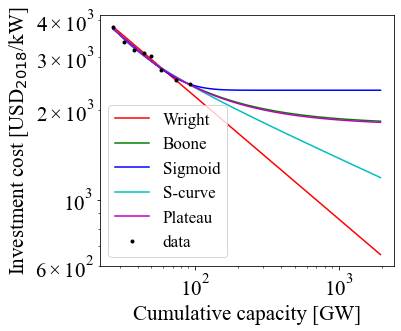

In [77]:
plot("RES_PV")

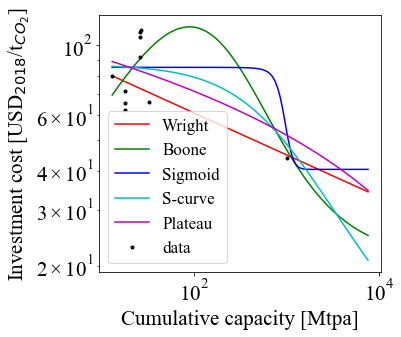

In [84]:
plot_carbon_capture("CARBON_CAPTURE")

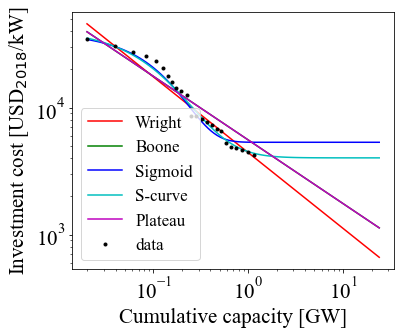

In [85]:
plot_gshp("DHN_HP_ELEC")

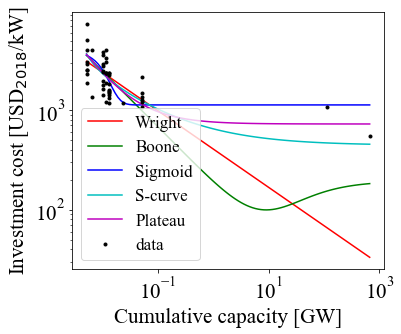

In [91]:
plot_electrolysis("PEM_ELECTROLYSIS")

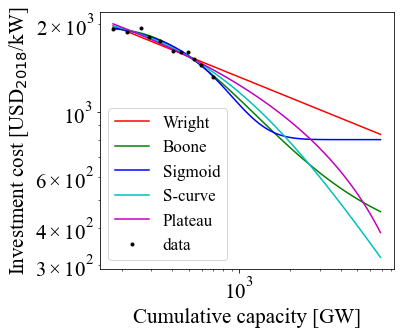

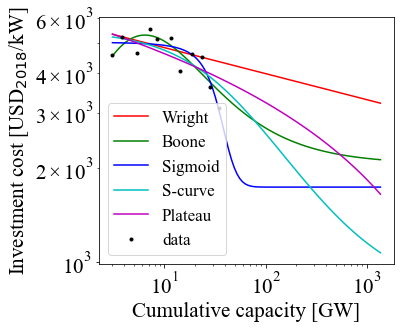

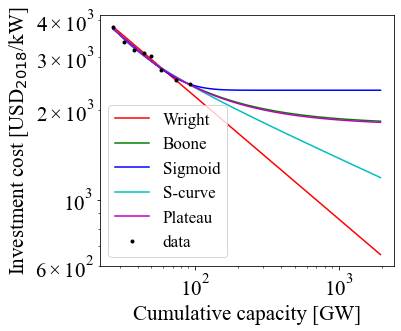

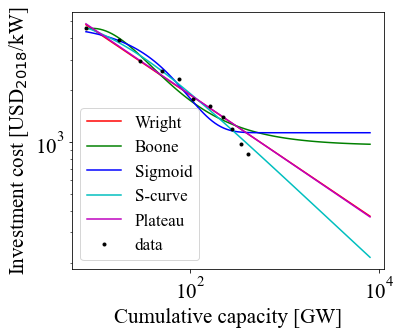

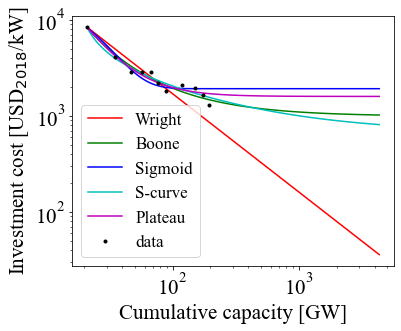

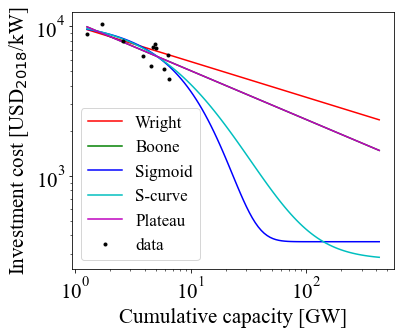

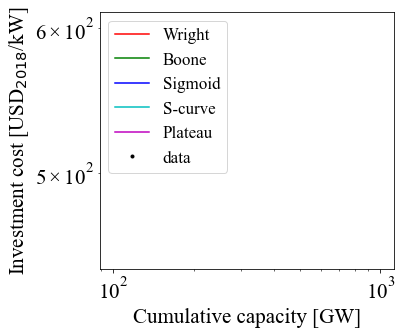

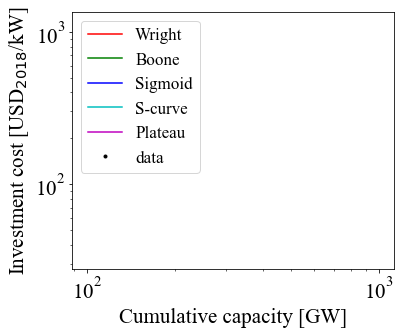

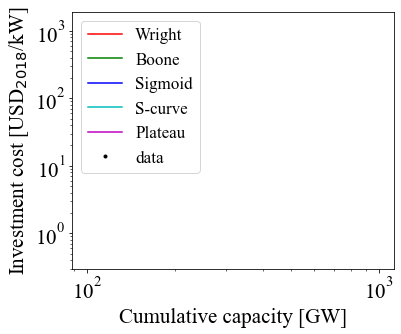

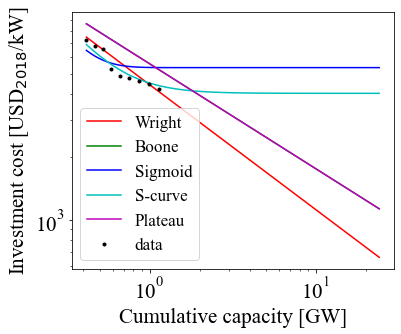

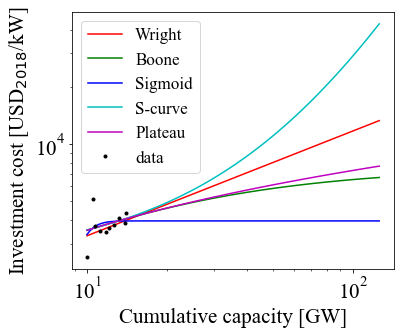

C:\Users\QQ6354\AppData\Local\Temp/ipykernel_3420/6962530.py:2: RuntimeWarning: overflow encountered in exp
  return a/(b+np.exp(-c*x))+d


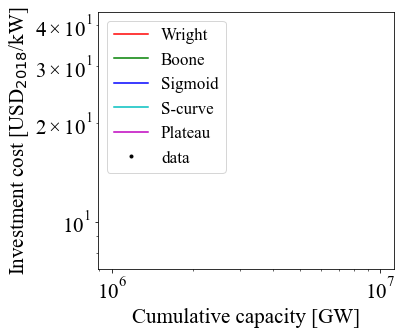

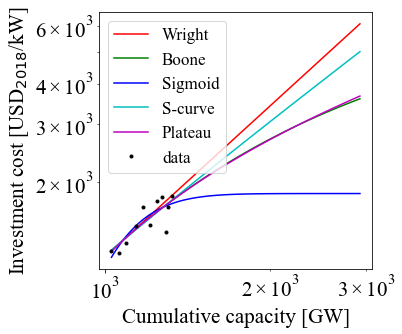

In [83]:
for tech in data.tech.unique():
    plot(tech)